# import necessary libraries


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
pd.options.display.max_columns = None #to get clearer visualization


# read our data


In [26]:
data=pd.read_csv("A:/ODC data science/data/New folder/airline-price-classification.csv")


# check for null values


In [27]:
data.isna().sum()

date              0
airline           0
ch_code           0
num_code          0
dep_time          0
time_taken        0
stop              0
arr_time          0
type              0
route             0
TicketCategory    0
dtype: int64

# check for datatypes


In [28]:
data.dtypes

date              object
airline           object
ch_code           object
num_code           int64
dep_time          object
time_taken        object
stop              object
arr_time          object
type              object
route             object
TicketCategory    object
dtype: object

# changing date col to dateime type


In [29]:
data["date"]=data["date"].str.replace('-','/') #fixing one format for dates
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y') #changing to datetime
#see updates
data


,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,TicketCategory
0,2022-03-05,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive
1,2022-03-18,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive
2,2022-03-09,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap
3,2022-03-15,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate
4,2022-03-22,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate
...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,Air India,AI,430,9:55,09h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:20,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap
240204,2022-02-15,Air India,AI,489,19:10,17h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:30,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive
240205,2022-02-23,Indigo,6E,2036,22:50,02h 55m,non-stop,1:45,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate
240206,2022-02-11,Vistara,UK,813,17:35,28h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:50,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate


# splitting departure time into 2 cols

In [30]:
data['dep_hour']=data["dep_time"].str.split(":").str[0] #dep hour
data['dep_min']=data["dep_time"].str.split(":").str[1] #dep min
data=data.drop("dep_time",axis=1)#dropping old col

data

,date,airline,ch_code,num_code,time_taken,stop,arr_time,type,route,TicketCategory,dep_hour,dep_min
0,2022-03-05,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive,9,45
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive,5,45
2,2022-03-09,GO FIRST,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap,14,30
3,2022-03-15,GO FIRST,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate,10,40
4,2022-03-22,Vistara,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,Air India,AI,430,09h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:20,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap,9,55
240204,2022-02-15,Air India,AI,489,17h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:30,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive,19,10
240205,2022-02-23,Indigo,6E,2036,02h 55m,non-stop,1:45,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate,22,50
240206,2022-02-11,Vistara,UK,813,28h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:50,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate,17,35


# splitting arrival time into 2 cols

In [31]:
data['arr_hour']=data["arr_time"].str.split(":").str[0] #arr hour
data['arr_min']=data["arr_time"].str.split(":").str[1] #arr min
data=data.drop("arr_time",axis=1)#dropping old col
data

,date,airline,ch_code,num_code,time_taken,stop,type,route,TicketCategory,dep_hour,dep_min,arr_hour,arr_min
0,2022-03-05,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive,9,45,19,55
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive,5,45,12,15
2,2022-03-09,GO FIRST,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap,14,30,22,40
3,2022-03-15,GO FIRST,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate,10,40,20,20
4,2022-03-22,Vistara,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate,12,30,19,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,Air India,AI,430,09h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap,9,55,19,20
240204,2022-02-15,Air India,AI,489,17h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive,19,10,12,30
240205,2022-02-23,Indigo,6E,2036,02h 55m,non-stop,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate,22,50,1,45
240206,2022-02-11,Vistara,UK,813,28h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate,17,35,21,50


# create dummy values for airline col


In [32]:
data=pd.get_dummies(data,columns=["airline"],prefix=["airline"])
data

,date,ch_code,num_code,time_taken,stop,type,route,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,2022-03-05,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive,9,45,19,55,0,0,0,0,0,0,0,1
1,2022-03-18,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive,5,45,12,15,0,0,0,0,0,0,0,1
2,2022-03-09,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap,14,30,22,40,0,0,1,0,0,0,0,0
3,2022-03-15,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate,10,40,20,20,0,0,1,0,0,0,0,0
4,2022-03-22,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate,12,30,19,55,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,AI,430,09h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap,9,55,19,20,1,0,0,0,0,0,0,0
240204,2022-02-15,AI,489,17h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive,19,10,12,30,1,0,0,0,0,0,0,0
240205,2022-02-23,6E,2036,02h 55m,non-stop,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate,22,50,1,45,0,0,0,1,0,0,0,0
240206,2022-02-11,UK,813,28h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate,17,35,21,50,0,0,0,0,0,0,0,1


# slicing only the hours taken


In [33]:
data['time_taken']=data["time_taken"].str.split("h").str[0]
data

,date,ch_code,num_code,time_taken,stop,type,route,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,2022-03-05,UK,812,10,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive,9,45,19,55,0,0,0,0,0,0,0,1
1,2022-03-18,UK,975,06,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive,5,45,12,15,0,0,0,0,0,0,0,1
2,2022-03-09,G8,7537,08,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap,14,30,22,40,0,0,1,0,0,0,0,0
3,2022-03-15,G8,287,09,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate,10,40,20,20,0,0,1,0,0,0,0,0
4,2022-03-22,UK,826,07,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate,12,30,19,55,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,AI,430,09,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap,9,55,19,20,1,0,0,0,0,0,0,0
240204,2022-02-15,AI,489,17,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive,19,10,12,30,1,0,0,0,0,0,0,0
240205,2022-02-23,6E,2036,02,non-stop,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate,22,50,1,45,0,0,0,1,0,0,0,0
240206,2022-02-11,UK,813,28,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate,17,35,21,50,0,0,0,0,0,0,0,1


# applying label encondig on stop col


In [34]:
data['stop'] = data['stop'].str.slice(0, 1) #taking the first letter
data['stop'] = data['stop'].replace("n", 0) #replacing non-stop string with Zero
data

,date,ch_code,num_code,time_taken,stop,type,route,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,2022-03-05,UK,812,10,1,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive,9,45,19,55,0,0,0,0,0,0,0,1
1,2022-03-18,UK,975,06,1,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive,5,45,12,15,0,0,0,0,0,0,0,1
2,2022-03-09,G8,7537,08,1,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap,14,30,22,40,0,0,1,0,0,0,0,0
3,2022-03-15,G8,287,09,1,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate,10,40,20,20,0,0,1,0,0,0,0,0
4,2022-03-22,UK,826,07,1,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate,12,30,19,55,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,AI,430,09,1,economy,"{'source': 'Chennai', 'destination': 'Hyderabad'}",cheap,9,55,19,20,1,0,0,0,0,0,0,0
240204,2022-02-15,AI,489,17,1,business,"{'source': 'Delhi', 'destination': 'Kolkata'}",expensive,19,10,12,30,1,0,0,0,0,0,0,0
240205,2022-02-23,6E,2036,02,0,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",moderate,22,50,1,45,0,0,0,1,0,0,0,0
240206,2022-02-11,UK,813,28,1,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",moderate,17,35,21,50,0,0,0,0,0,0,0,1


# splitting the route col in 2 new cols and cleanning the strings


In [35]:
data[['source','destination']]=data["route"].str.split(",",expand=True) #splitting on comma and getting the results in 2 new cols
data['source']=data["source"].str.split().str[1] #taking the second word
data['source']=data["source"].str.strip("''")    #cleanning

data['destination']=data["destination"].str.split().str[1]
data['destination']=data["destination"].str.strip("''}")
data=data.drop(["route"],axis=1)
data

,date,ch_code,num_code,time_taken,stop,type,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,source,destination
0,2022-03-05,UK,812,10,1,business,very expensive,9,45,19,55,0,0,0,0,0,0,0,1,Bangalore,Hyderabad
1,2022-03-18,UK,975,06,1,business,very expensive,5,45,12,15,0,0,0,0,0,0,0,1,Delhi,Hyderabad
2,2022-03-09,G8,7537,08,1,economy,cheap,14,30,22,40,0,0,1,0,0,0,0,0,Mumbai,Hyderabad
3,2022-03-15,G8,287,09,1,economy,moderate,10,40,20,20,0,0,1,0,0,0,0,0,Mumbai,Delhi
4,2022-03-22,UK,826,07,1,economy,moderate,12,30,19,55,0,0,0,0,0,0,0,1,Chennai,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,AI,430,09,1,economy,cheap,9,55,19,20,1,0,0,0,0,0,0,0,Chennai,Hyderabad
240204,2022-02-15,AI,489,17,1,business,expensive,19,10,12,30,1,0,0,0,0,0,0,0,Delhi,Kolkata
240205,2022-02-23,6E,2036,02,0,economy,moderate,22,50,1,45,0,0,0,1,0,0,0,0,Delhi,Bangalore
240206,2022-02-11,UK,813,28,1,economy,moderate,17,35,21,50,0,0,0,0,0,0,0,1,Delhi,Mumbai


# extracting day, month, day of year, from date


In [36]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data['dayofyear'] = pd.DatetimeIndex(data['date']).dayofyear
data=data.drop("date",axis=1) #dropping the date col
data

,ch_code,num_code,time_taken,stop,type,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,source,destination,month,day,dayofyear
0,UK,812,10,1,business,very expensive,9,45,19,55,0,0,0,0,0,0,0,1,Bangalore,Hyderabad,3,5,64
1,UK,975,06,1,business,very expensive,5,45,12,15,0,0,0,0,0,0,0,1,Delhi,Hyderabad,3,18,77
2,G8,7537,08,1,economy,cheap,14,30,22,40,0,0,1,0,0,0,0,0,Mumbai,Hyderabad,3,9,68
3,G8,287,09,1,economy,moderate,10,40,20,20,0,0,1,0,0,0,0,0,Mumbai,Delhi,3,15,74
4,UK,826,07,1,economy,moderate,12,30,19,55,0,0,0,0,0,0,0,1,Chennai,Kolkata,3,22,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,AI,430,09,1,economy,cheap,9,55,19,20,1,0,0,0,0,0,0,0,Chennai,Hyderabad,3,25,84
240204,AI,489,17,1,business,expensive,19,10,12,30,1,0,0,0,0,0,0,0,Delhi,Kolkata,2,15,46
240205,6E,2036,02,0,economy,moderate,22,50,1,45,0,0,0,1,0,0,0,0,Delhi,Bangalore,2,23,54
240206,UK,813,28,1,economy,moderate,17,35,21,50,0,0,0,0,0,0,0,1,Delhi,Mumbai,2,11,42


# applying label encoder for the rest features

In [37]:
objList = data.select_dtypes(include = "object").columns #selecting the object datatype
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in objList:
    data[x] = le.fit_transform(data[x].astype(str))

data

,ch_code,num_code,time_taken,stop,type,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,source,destination,month,day,dayofyear
0,7,812,12,1,0,3,23,9,11,11,0,0,0,0,0,0,0,1,0,3,3,5,64
1,7,975,6,1,0,3,19,9,4,3,0,0,0,0,0,0,0,1,2,3,3,18,77
2,3,7537,8,1,1,0,6,6,15,8,0,0,1,0,0,0,0,0,5,3,3,9,68
3,3,287,9,1,1,2,2,8,13,4,0,0,1,0,0,0,0,0,5,2,3,15,74
4,7,826,7,1,1,2,4,6,11,11,0,0,0,0,0,0,0,1,1,4,3,22,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2,430,9,1,1,0,23,11,11,4,1,0,0,0,0,0,0,0,1,3,3,25,84
240204,2,489,19,1,0,1,11,2,4,6,1,0,0,0,0,0,0,0,2,4,2,15,46
240205,1,2036,2,0,1,2,15,10,1,9,0,0,0,1,0,0,0,0,2,0,2,23,54
240206,7,813,31,1,1,2,9,7,14,10,0,0,0,0,0,0,0,1,2,5,2,11,42


# using standard scaler to scale the remaining features

In [38]:
from sklearn.preprocessing import StandardScaler
col_names =['num_code', 'time_taken', 'dep_hour', 'arr_hour',"dayofyear","day"] 
ss = StandardScaler()
data[col_names]=ss.fit_transform(data[col_names])
data

,ch_code,num_code,time_taken,stop,type,TicketCategory,dep_hour,dep_min,arr_hour,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,source,destination,month,day,dayofyear
0,7,-0.308071,-0.130150,1,0,3,1.487981,9,-0.166544,11,0,0,0,0,0,0,0,1,0,3,3,-1.533623,-0.220495
1,7,-0.225781,-0.854603,1,0,3,0.915164,9,-1.266918,3,0,0,0,0,0,0,0,1,2,3,3,0.077282,0.738065
2,3,3.087048,-0.613119,1,1,0,-0.946489,6,0.462241,8,0,0,1,0,0,0,0,0,5,3,3,-1.037960,0.074447
3,3,-0.573118,-0.492377,1,1,2,-1.519306,8,0.147849,4,0,0,1,0,0,0,0,0,5,2,3,-0.294465,0.516859
4,7,-0.301003,-0.733861,1,1,2,-1.232898,6,-0.166544,11,0,0,0,0,0,0,0,1,1,4,3,0.572945,1.033007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2,-0.500924,-0.492377,1,1,0,1.487981,11,-0.166544,4,1,0,0,0,0,0,0,0,1,3,3,0.944693,1.254213
240204,2,-0.471138,0.715045,1,0,1,-0.230469,2,-1.266918,6,1,0,0,0,0,0,0,0,2,4,2,-0.294465,-1.547731
240205,1,0.309866,-1.337572,0,1,2,0.342348,10,-1.738506,9,0,0,0,1,0,0,0,0,2,0,2,0.696861,-0.957848
240206,7,-0.307566,2.163950,1,1,2,-0.516877,7,0.305045,10,0,0,0,0,0,0,0,1,2,5,2,-0.790128,-1.842673


# splitting the data into features and labels


In [39]:
x= data.loc[:,data.columns!="TicketCategory"]
y=data['TicketCategory']


# split the data for train and test


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=2, test_size=0.20,)

In [41]:
from sklearn.metrics import accuracy_score #importing accuracy


# importing random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier 
model1 = RandomForestClassifier( random_state=42,n_estimators=100)
model1.fit(X_train, y_train)
res1= model1.predict(X_test)
acc1 = accuracy_score(y_test, res1)
print('Model accuracy score: ', acc1*100)


Model accuracy score:  96.70080346363599


# impoting gaussian naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)
res3 = model3.predict(X_test)
acc3=accuracy_score(y_test, res3)
print('Model accuracy score:',acc3*100)



Model accuracy score: 70.95666291994505


# importing descision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(max_depth=100,random_state=2)
model4.fit(X_train, y_train)
res4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, res4)
print('Model accuracy score:',acc4*100 )


Model accuracy score: 96.41147329420092


# importing LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(X_train, y_train)
res5 = model5.predict(X_test)
acc5 = accuracy_score(y_test, res5)
print('Model accuracy score:',acc5*100 )



Model accuracy score: 74.95524749177804


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# importing RidgeClassifier

In [46]:
from sklearn.linear_model import RidgeClassifier
model6 = RidgeClassifier(alpha = 0.1)
model6.fit(X_train, y_train)
res6=model6.predict(X_test)
acc6 = accuracy_score(y_test, res6)
print('Model accuracy score:',acc6*100 )




Model accuracy score: 72.53861204779152


# importing KNeighborsClassifier 

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
model2 =KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
res2=model2.predict(X_test)
acc2= (accuracy_score(y_test,res2))
print( 'Model accuracy score: ',acc2*100)  


Model accuracy score:  93.03526081345488


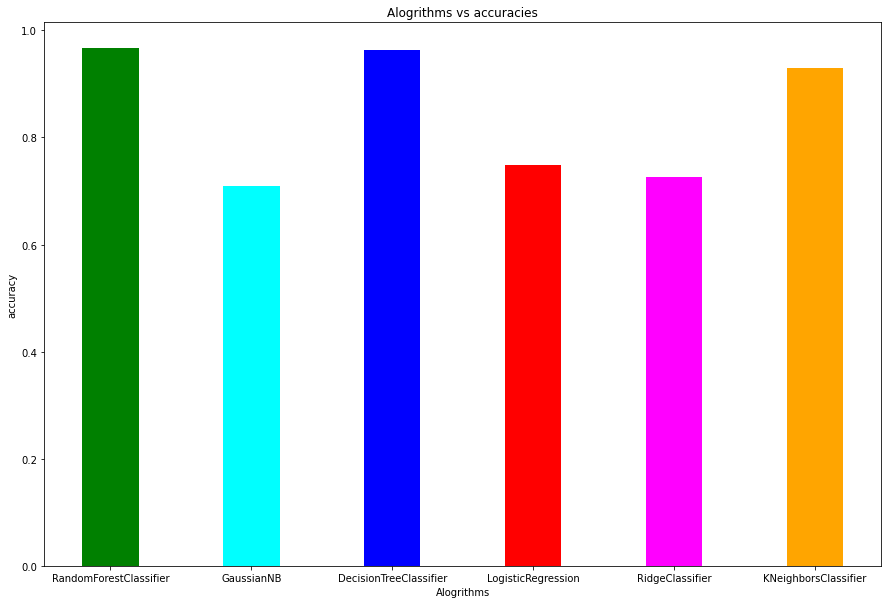

In [48]:
final = {'RandomForestClassifier':acc1, 'GaussianNB':acc3, 'DecisionTreeClassifier':acc4,'LogisticRegression':acc5,'RidgeClassifier':acc6,'KNeighborsClassifier':acc2}
algos = list(final.keys())
accs = list(final.values())
colors=['green','cyan',"blue","red","magenta","orange"]
fig = plt.figure(figsize = (15, 10))
plt.bar(algos, accs, color =colors,width = 0.4)
plt.xlabel("Alogrithms")
plt.ylabel("accuracy")
plt.title("Alogrithms vs accuracies")
plt.show()

# saving the best model random forest using joblib

In [52]:
import joblib
filename = "final_model.joblib"
joblib.dump(model1, filename,compress=3)


['final_model.joblib']